# MFA with frequency data

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
import pyreadr
result = pyreadr.read_r('./data/mortality.rda') 

mortality = result["mortality"]
mortality.head(6)

,15-24 (79),25-34 (79),35-44 (79),45-54 (79),55-64 (79),65-74 (79),75-84 (79),85-94 (79),95 and more (79),15-24 (06),25-34 (06),35-44 (06),45-54 (06),55-64 (06),65-74 (06),75-84 (06),85-94 (06),95 and more (06)
rownames,,,,,,,,,,,,,,,,,,
Accidental poisoning,82,72,54,64,43,74,73,40,1,54,109,141,135,89,97,196,159,27
Addiction to prescription medication,7,4,2,6,6,2,6,0,0,18,77,72,15,4,2,1,0,0
Alcohol abuse and alcohol-related psychosis,15,135,360,862,757,806,391,43,2,14,79,403,977,786,397,245,52,3
Asthma,17,28,29,102,167,397,556,184,15,12,11,30,81,99,138,290,280,52
Blood and hematopoietic disorders,30,38,47,110,192,482,838,417,23,20,22,43,94,159,259,642,670,213
Cerebrovascular disease,92,269,551,1924,3597,13683,28719,16169,1153,35,75,311,902,1575,3719,12172,11385,2464


In [3]:
from scientisttools import MFACT

res_mfact = MFACT(group=[9,9],name_group=["1979","2006"],parallelize=True)
res_mfact.fit(mortality)

MFACT(group=[9, 9], name_group=['1979', '2006'], parallelize=True)

## Eigenvalues plot

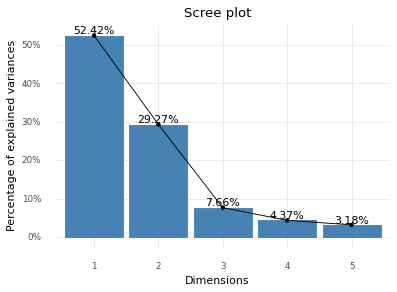

In [4]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_mfact,add_labels=True)
print(p)

## Individuals Factor Map

### Color by RGB color

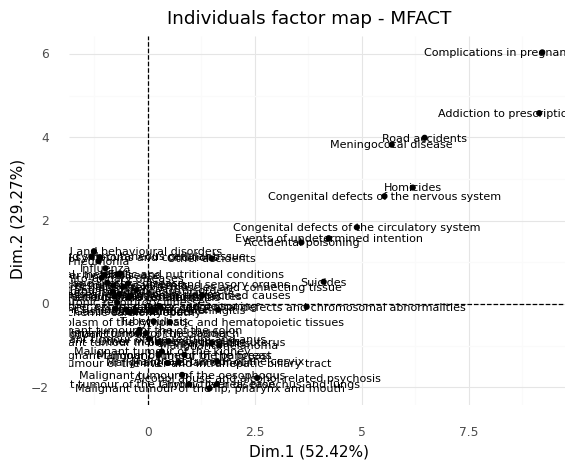

In [5]:
from scientisttools import fviz_mfa_ind
p = fviz_mfa_ind(res_mfact,repel=False,ind_sup=False,quali_sup=False)
print(p)

### Color by cos2

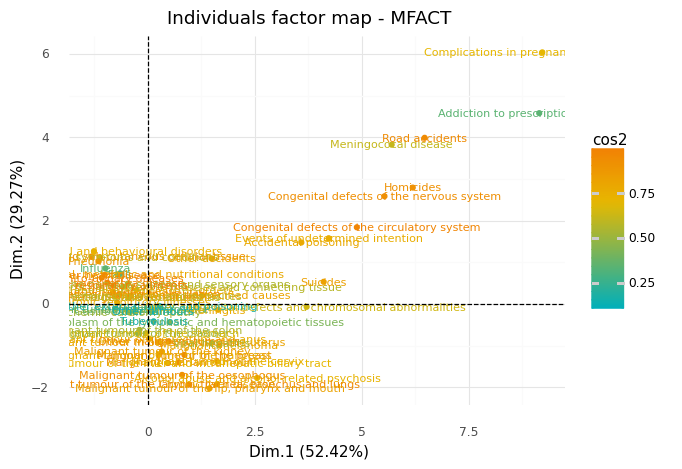

In [6]:
p = fviz_mfa_ind(res_mfact,color="cos2",repel=False,ind_sup=False,quali_sup=False)
print(p)

## Frequency plot

### Color by RGB color

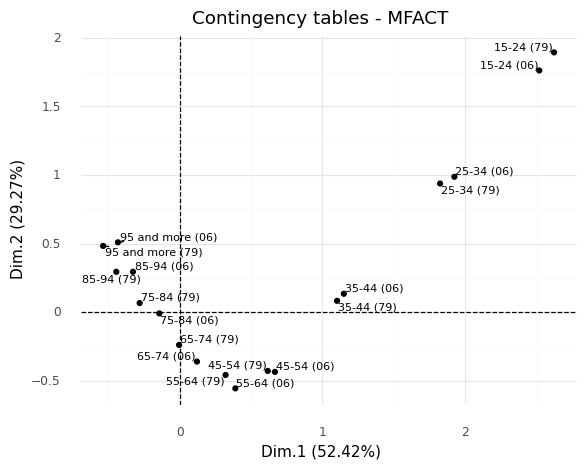

In [7]:
from scientisttools import fviz_mfa_freq
p = fviz_mfa_freq(res_mfact,repel=True)
print(p)

### Color by cos2

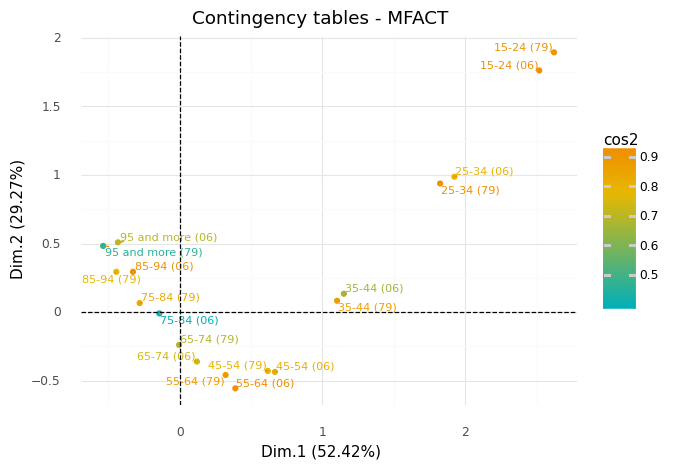

In [8]:
p = fviz_mfa_freq(res_mfact,color="cos2",repel=True)
print(p)

### Color by group

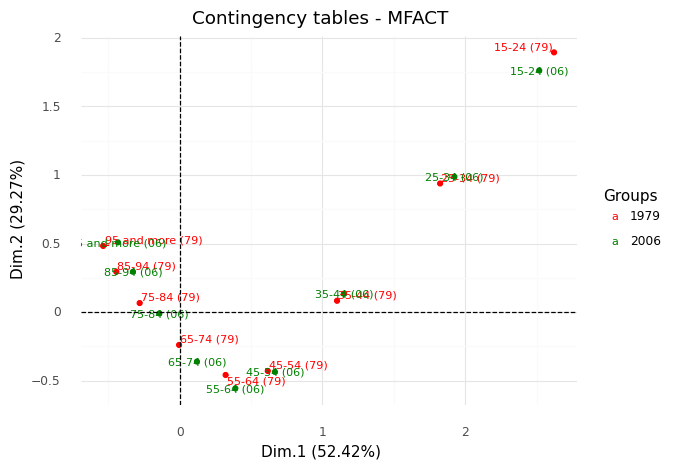

In [9]:
import plotnine as pn
p = (fviz_mfa_freq(res_mfact,color="group",repel=True)+
     pn.scale_color_manual(values=["red","green"]))
print(p)

### Partial axes

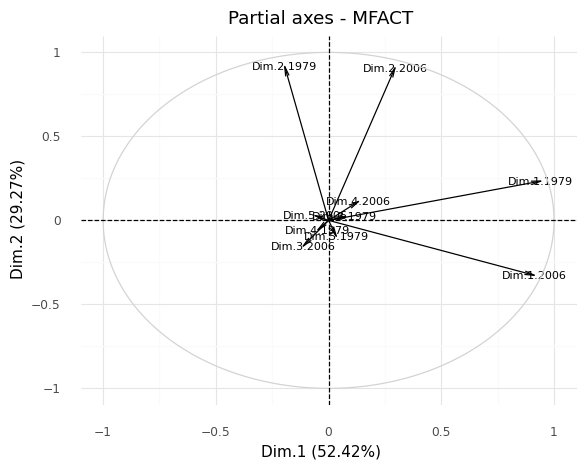

In [10]:
from scientisttools import fviz_mfa_axes
p = fviz_mfa_axes(res_mfact,color="black")
print(p)

### Color by group

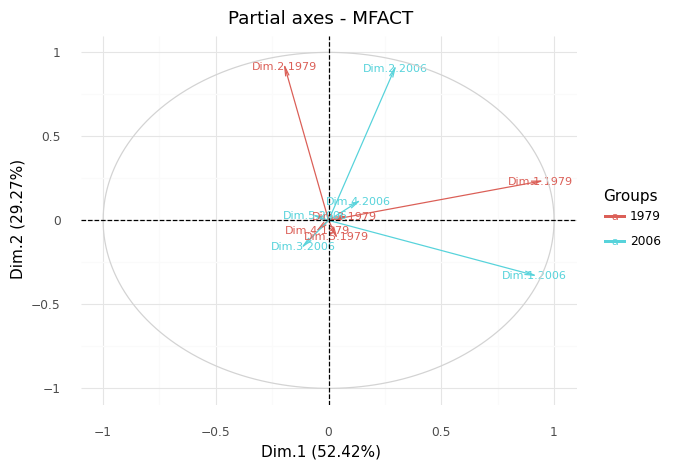

In [11]:
p = fviz_mfa_axes(res_mfact)
print(p)